In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from astropy.io import ascii

In [234]:
psf_table = ascii.read('./imagenes-LN-PSF/im_06_2_psf_grid.csv')

In [235]:
psf_table

x,y,sx,sy,ellip,theta,a_times_b,a,b,c11,c12,c21,c22,detc
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0,1.84037192904,1.76060859547,0.022150448475,-0.0603665342251,12.9606985485,3.68074385808,3.52121719094,0.147674411384,-0.000823754663048,-0.000823754663048,0.16125392691,0.29923544573
0,64,1.84175559948,1.76192399816,0.0221528021981,-0.0603677001138,12.9801335579,3.68351119895,3.52384799633,0.147452613106,-0.00082262456209,-0.00082262456209,0.161013234562,0.29834003278
0,128,1.84283548489,1.76294947559,0.0221549565991,-0.0603687474775,12.9953034067,3.68567096979,3.52589895118,0.147279858635,-0.000821758459696,-0.000821758459696,0.160825965435,0.297643914879
0,192,1.84363011548,1.76370271361,0.0221569247043,-0.0603696940036,13.0064617503,3.68726023097,3.52740542721,0.147152932765,-0.000821139287485,-0.000821139287485,0.160688618644,0.297133431942
0,256,1.84415870446,1.7642020581,0.0221587173868,-0.0603705584478,13.0138743275,3.68831740893,3.5284041162,0.147068593934,-0.000820749734096,-0.000820749734096,0.160597662782,0.29679503967
0,320,1.8444410302,1.76446640119,0.0221603436858,-0.0603713604689,13.0178169071,3.6888820604,3.52893280238,0.147023579376,-0.00082057228809,-0.00082057228809,0.160549541791,0.296615292041
0,384,1.84449732307,1.76451507198,0.0221618111357,-0.0603721204693,13.0185733072,3.68899464614,3.52903014397,0.147014610064,-0.000820589279572,-0.000820589279572,0.160540680616,0.296580825388
0,448,1.84434815883,1.76436773349,0.0221631260905,-0.060372859443,13.0164335231,3.68869631767,3.52873546698,0.147038395339,-0.000820782919616,-0.000820782919616,0.16056749051,0.296678343821
0,512,1.84401435993,1.76404428717,0.0221642940373,-0.0603735988337,13.0116919884,3.68802871986,3.52808857434,0.147091637157,-0.00082113533675,-0.00082113533675,0.160626373892,0.296894605774


In [236]:
x = psf_table['x']
y = psf_table['y']
e = psf_table['ellip'] % 2.*np.pi
w = psf_table['a']#1./(1.-psf_table['ellip'])
u = w * np.cos(psf_table['theta'])
v = w * np.sin(psf_table['theta'])

In [247]:
f = np.arange(0, len(x), 5)

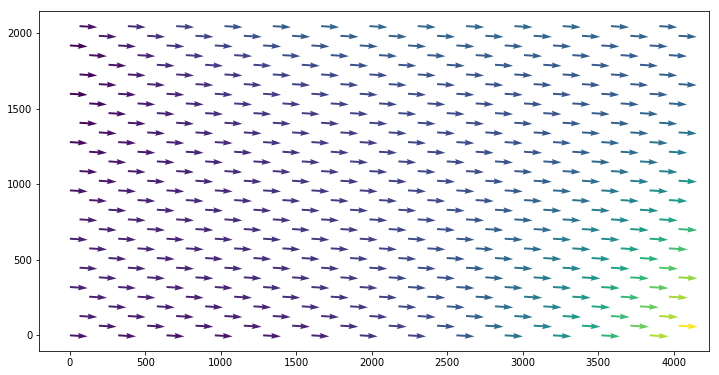

In [248]:
plt.figure(figsize=(12, 12))
plt.quiver(x[f], y[f], u[f], v[f], psf_table['a_times_b'][f])
plt.axes().set_aspect('equal')

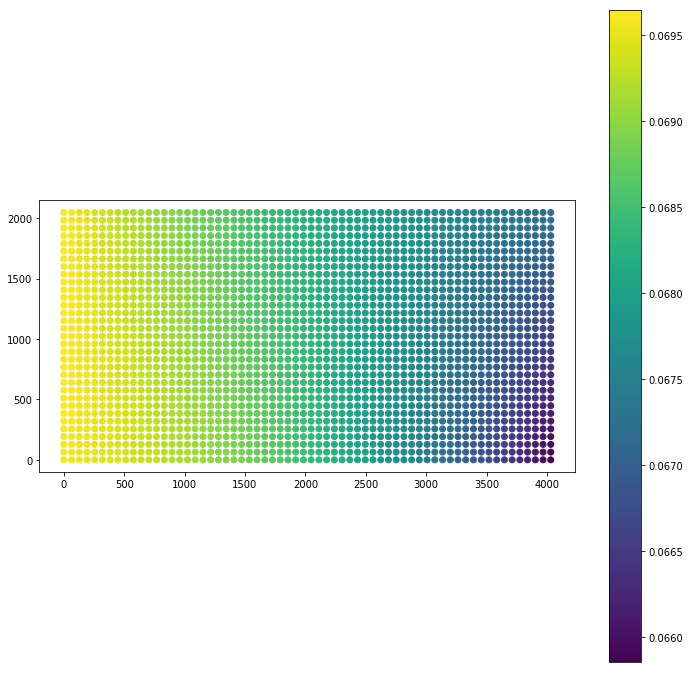

In [239]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=e, cmap='viridis')
plt.colorbar()
plt.axes().set_aspect('equal')

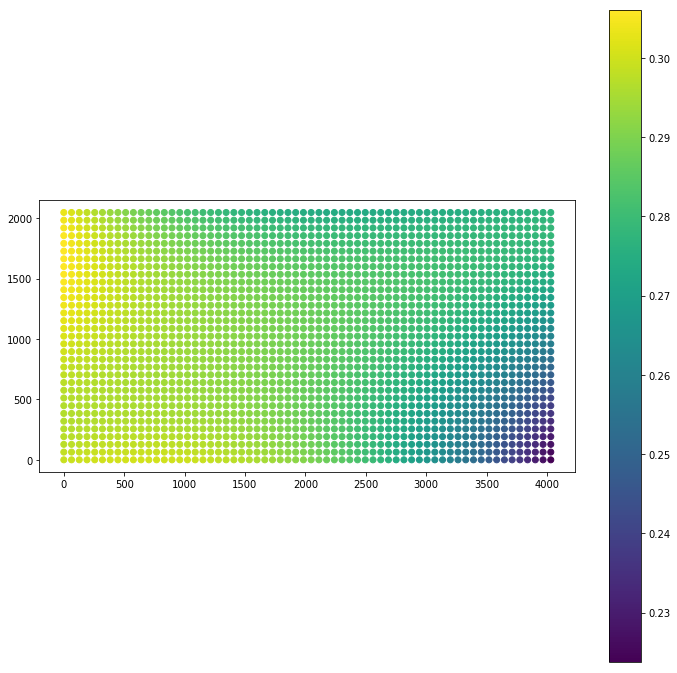

In [240]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=psf_table['detc'], cmap='viridis')
plt.colorbar()
plt.axes().set_aspect('equal')

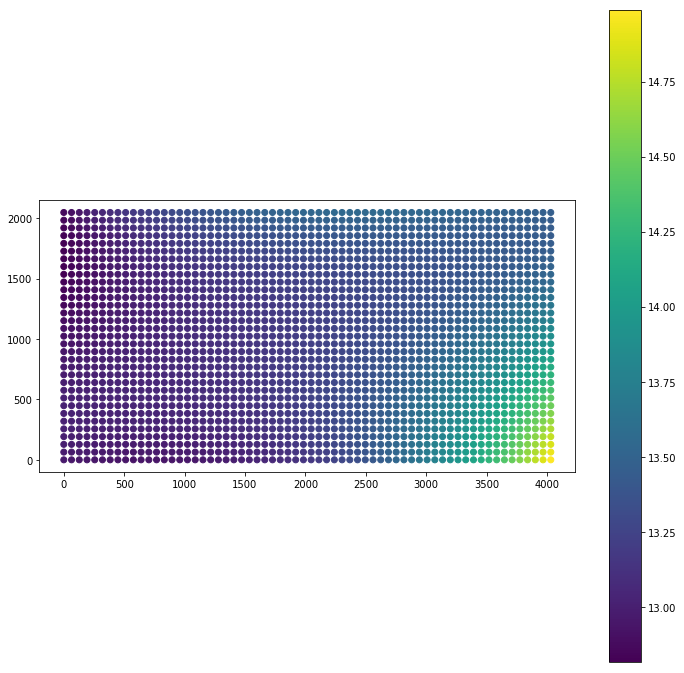

In [241]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=psf_table['a_times_b'], cmap='viridis')
plt.colorbar()
plt.axes().set_aspect('equal')

In [193]:
from astropy.modeling import fitting, models

In [172]:
p = models.Gaussian2D(amplitude=10, theta=3*np.pi/4., x_stddev=2., y_stddev=3., x_mean=10, y_mean=10)
img = p.render()

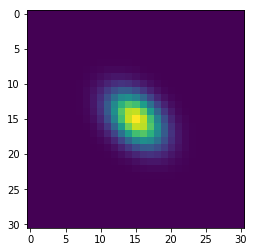

In [173]:
plt.imshow(img)

In [151]:
size = img.shape
x, y =np.mgrid[:size[0],:size[1]]
ff = models.Gaussian2D(x_mean=(size[0]/2.), y_mean=(size[1]/2.),
                       x_stddev=1., y_stddev=1.,
                       theta=0.,
                       amplitude=img.max())
#ff = ff + models.Const2D(amplitude=img.min())
fiter = fitting.LevMarLSQFitter()

In [159]:
fitted = fiter(ff, x, y, img, maxiter=5000)
print fitted

Model: Gaussian2D
Inputs: (u'x', u'y')
Outputs: (u'z',)
Model set size: 1
Parameters:
    amplitude x_mean y_mean x_stddev y_stddev    theta    
    --------- ------ ------ -------- -------- ------------
         10.0   15.0   15.0      2.0      3.0 49.480084294


In [161]:
np.deg2rad(fitted.theta)/np.pi

0.2748893571891069

In [169]:
(fitted.theta/np.pi) % 2

1.75

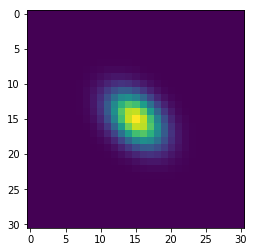

In [158]:
plt.imshow(fitted.render())